# Introduction to Keras

In [1]:
%%capture --no-display
!pip install keras --upgrade
!pip install tensorflow

## Notebook Imports

In [2]:
from keras import models
from keras import layers
import numpy as np
from random import randint
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_labels = []
train_samples = []

### Example

* In a clinical trial with 2100 participants from 13 to 100
* Half under 65 and half 65 or older
* 95% of the older group had side effects
* 95% of the younger group had no side effects

In [4]:
for i in range(50):
    # ~5% of younger individuals who did experience side effect
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # ~5% of older individuals who did not experience side effect
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # ~95% of younger individuals who did not experience side effect
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [7]:
scaled_train_samples

array([[0.06896552],
       [0.29885057],
       [0.5862069 ],
       ...,
       [1.        ],
       [0.43678161],
       [0.90804598]])

### Simple tf.keras Sequential Model

### Notebook Imports

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy 

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available:', len(physical_devices)) 

Num GPUs Available: 1


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, 
          batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 3s - loss: 0.6695 - accuracy: 0.5312 - val_loss: 0.6526 - val_accuracy: 0.5810 - 3s/epoch - 16ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6468 - accuracy: 0.6048 - val_loss: 0.6225 - val_accuracy: 0.6762 - 437ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6156 - accuracy: 0.6862 - val_loss: 0.5938 - val_accuracy: 0.7524 - 426ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5875 - accuracy: 0.7392 - val_loss: 0.5657 - val_accuracy: 0.7857 - 423ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5585 - accuracy: 0.7762 - val_loss: 0.5375 - val_accuracy: 0.8095 - 433ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5290 - accuracy: 0.8111 - val_loss: 0.5085 - val_accuracy: 0.8190 - 428ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4992 - accuracy: 0.8302 - val_loss: 0.4810 - val_accuracy: 0.8286 - 431ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4701 - accuracy: 0.8561 - val_loss: 0.4543 - val_accuracy: 0.8333 - 424ms/epoch - 2ms/step
Ep

## Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(10):
    # ~5% of younger individuals who did experience side effect
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # ~5% of older individuals who did not experience side effect
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # ~95% of younger individuals who did not experience side effect
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [20]:
rounded_predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

## Confusion Matrix

In [21]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title="Confusion Matrix", cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")
        
    print(cm)
    
    tresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                color='white' if cm[i, j] > tresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

Confusion Matrix, without normalization
[[197  13]
 [ 10 200]]


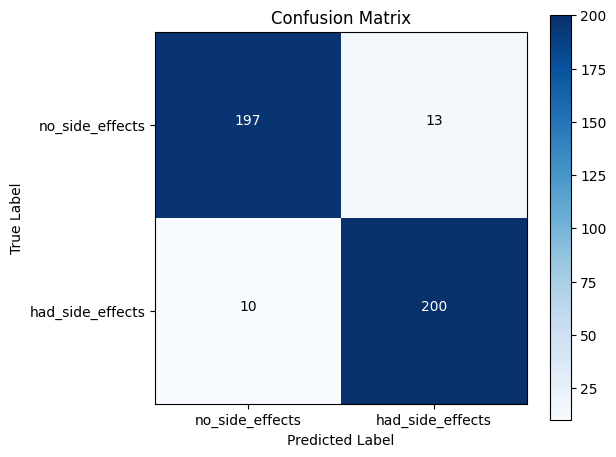

In [24]:
plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=plot_labels)

## Save and Load a Model 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
import os.path

if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**This save function saves:**

* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer).
* The state of the optimizer, allowing to resume training exactly where you left off.

In [27]:
from tensorflow.keras.models import load_model, model_from_json

new_model = load_model('models/medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# new_model.get_weights()

In [30]:
new_model.optimizer

### 2. model.to_json()

In [31]:
# save as JSON
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class

In [32]:
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Convolutional Neural Networks

In [33]:
import numpy as np
import zipfile

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Unzipping Files from train.zip, test.zip

In [34]:
os.makedirs('/kaggle/working/train')
os.makedirs('/kaggle/working/test')

In [35]:
cd /kaggle/input/dogs-vs-cats

/kaggle/input/dogs-vs-cats


In [36]:
%%capture --no-display
!unzip /kaggle/input/dogs-vs-cats/train.zip -d /kaggle/working/train

In [37]:
cd /kaggle/input/dogs-vs-cats

/kaggle/input/dogs-vs-cats


In [38]:
%%capture --no-display
!unzip /kaggle/input/dogs-vs-cats/test1.zip -d /kaggle/working/test

### Data Preparation

In [39]:
os.chdir('/kaggle/working/')

if os.path.isdir('train_set/dog') is False:
    os.makedirs('train_set/dog')
    os.makedirs('train_set/cat')
    os.makedirs('valid_set/dog')
    os.makedirs('valid_set/cat')
    os.makedirs('test_set/cat')
    os.makedirs('test_set/dog')
    
try:
    for c in random.sample(glob.glob('/kaggle/working/train/train/cat.*'), 500):
        shutil.move(c, 'train_set/cat')
    for c in random.sample(glob.glob('/kaggle/working/train/train/dog.*'), 500):
        shutil.move(c, 'train_set/dog')
    for c in random.sample(glob.glob('/kaggle/working/train/train/cat.*'), 100):
        shutil.move(c, 'valid_set/cat')
    for c in random.sample(glob.glob('/kaggle/working/train/train/dog.*'), 100):
        shutil.move(c, 'valid_set/dog')
    for c in random.sample(glob.glob('/kaggle/working/train/train/cat.*'), 50):
        shutil.move(c, 'test_set/cat')
    for c in random.sample(glob.glob('/kaggle/working/train/train/dog.*'), 50):
        shutil.move(c, 'test_set/dog')

except Exception as e:
    print(f"An error occurred: {e}")

os.chdir('../..')

In [40]:
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

In [41]:
folder_path = '/kaggle/working/train'
remove_folder_contents(folder_path)
os.rmdir(folder_path)

folder_path = '/kaggle/working/test'
remove_folder_contents(folder_path)
os.rmdir(folder_path)

### Constants

In [42]:
train_set = "/kaggle/working/train_set"
test_set = "/kaggle/working/test_set"
valid_set = "/kaggle/working/valid_set"

In [43]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_set, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_set, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_set, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [44]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [45]:
imgs, labels = next(train_batches)

In [46]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

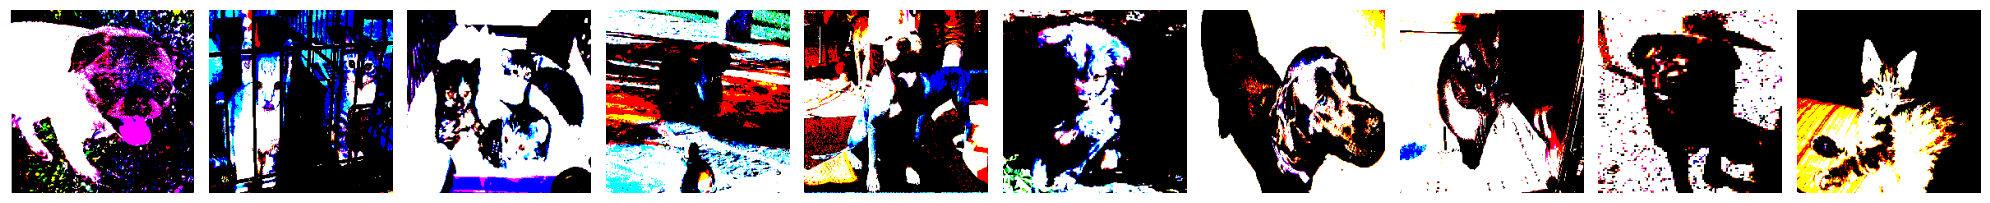

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [47]:
plotImages(imgs)
print(labels)

In [48]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [50]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches,
          validation_steps=len(valid_batches), epochs=10, verbose=2
)

Epoch 1/10
100/100 - 5s - loss: 35.2627 - accuracy: 0.5490 - val_loss: 21.4895 - val_accuracy: 0.5550 - 5s/epoch - 53ms/step
Epoch 2/10
100/100 - 3s - loss: 9.2936 - accuracy: 0.7230 - val_loss: 15.5004 - val_accuracy: 0.5450 - 3s/epoch - 28ms/step
Epoch 3/10
100/100 - 3s - loss: 4.2283 - accuracy: 0.8240 - val_loss: 17.8687 - val_accuracy: 0.5500 - 3s/epoch - 28ms/step
Epoch 4/10
100/100 - 3s - loss: 3.7406 - accuracy: 0.8340 - val_loss: 12.6991 - val_accuracy: 0.6150 - 3s/epoch - 28ms/step
Epoch 5/10
100/100 - 3s - loss: 2.6673 - accuracy: 0.8750 - val_loss: 16.5399 - val_accuracy: 0.6200 - 3s/epoch - 28ms/step
Epoch 6/10
100/100 - 3s - loss: 1.7146 - accuracy: 0.9090 - val_loss: 10.0960 - val_accuracy: 0.6650 - 3s/epoch - 28ms/step
Epoch 7/10
100/100 - 3s - loss: 0.7581 - accuracy: 0.9430 - val_loss: 9.8507 - val_accuracy: 0.6750 - 3s/epoch - 27ms/step
Epoch 8/10
100/100 - 3s - loss: 0.4199 - accuracy: 0.9700 - val_loss: 9.1983 - val_accuracy: 0.6600 - 3s/epoch - 27ms/step
Epoch 9/1